# Import the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the functions to be used

In [2]:
def update_system_time(df): # populates equispaced points in each block
    block_size = 128
    num_rows = df.shape[0]
    num_blocks = num_rows // block_size
    
    for i in range(num_blocks - 1):
        start_idx = i * 128
        end_idx = (i + 1) * 128
        start_time = df.loc[start_idx, 'System Time']
        end_time = df.loc[end_idx, 'System Time']
        
        # Generate the new equally spaced time values for each block
        new_times = pd.date_range(start=start_time, end=end_time, periods=block_size+1)[0:block_size]
        
        # Update the DataFrame with the new time values
        df.loc[start_idx:end_idx-1, 'System Time'] = new_times
    
    return df

In [3]:
def avg_sampling_rate(df): # find the average sampling rate across the entire space
    time_diffs = df['System Time'].iloc[::128].diff().dropna() # Calculate the time differences every 128 rows
    avg_time_diff = time_diffs.mean().total_seconds() # Calculate the average time difference in seconds
    sampling_rate = 128 / avg_time_diff # Calculate the sampling rate
    # print(f"The sampling rate of the signal is approximately {sampling_rate:.2f} Hz")
    return round(sampling_rate,2)

In [4]:
def sampling_rate_progression(df): # find the sampling rate after every block of code
    time_diffs = df['System Time'].iloc[::128].diff().dropna() # Calculate the time differences every 128 rows
    total_blocks = time_diffs.shape[0]
    sampling_rates = []
    for i in range(total_blocks):
        curr_samp_rate = 128/time_diffs.iloc[i].total_seconds()
        sampling_rates.append(round(curr_samp_rate,2))
    return sampling_rates

In [5]:
def preprocess_data(df):
    new_columns = ['Machine Time','Time Difference', 'System Time', 'Potential', 'Nan'] # rename columns
    df.columns = new_columns
    df['System Time'] = pd.to_datetime(df['System Time'], format='%d-%m-%Y %H:%M:%S.%f') # change the format of the time column
    return df

# Read and preprocess data

In [6]:
# read the waveform CSVs
df1 = pd.read_csv("new_samples/NOM_ECG_ELEC_POTL_IWaveExport.csv", header=None)
df2 = pd.read_csv("new_samples/NOM_ECG_ELEC_POTL_IIWaveExport.csv", header=None)
df3 = pd.read_csv("new_samples/NOM_ECG_ELEC_POTL_IIIWaveExport.csv", header=None)

In [7]:
df1 = preprocess_data(df1)
df2 = preprocess_data(df2)
df3 = preprocess_data(df3)

# Sampling rate

In [8]:
print("The average sampling rate of I is " + str(avg_sampling_rate(df1)) + " Hz.")
print("The average sampling rate of II is " + str(avg_sampling_rate(df2)) + " Hz.")
print("The average sampling rate of III is " + str(avg_sampling_rate(df3)) + " Hz.")

The average sampling rate of I is 550.54 Hz.
The average sampling rate of II is 550.43 Hz.
The average sampling rate of III is 550.54 Hz.


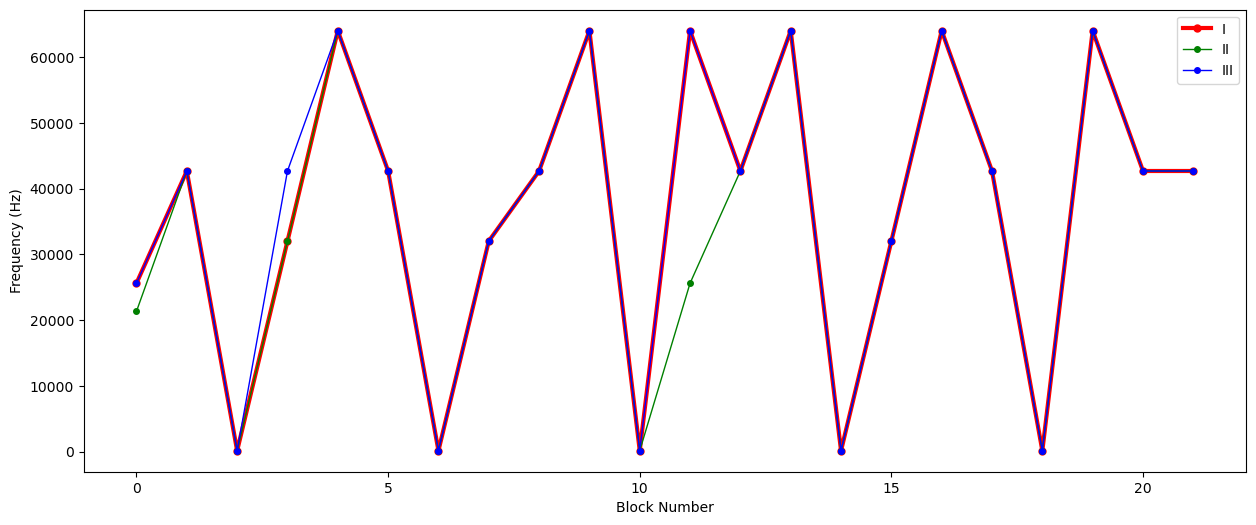

In [9]:
# Sampling rate progression
srp1 = sampling_rate_progression(df1)
srp2 = sampling_rate_progression(df2)
srp3 = sampling_rate_progression(df3)

# Plot of sampling rate progression
plt.figure(figsize=(15, 6))
plt.plot(srp1, marker='o', color='r', linestyle='-', linewidth=3, markersize=5, label="I")
plt.plot(srp2, marker='o', color='g', linestyle='-', linewidth=1, markersize=4, label="II")
plt.plot(srp3, marker='o', color='b', linestyle='-', linewidth=1, markersize=4, label="III")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Block Number")
plt.legend()

# Update system time: add equispaced values between the start and end of each block

In [10]:
df1_u = update_system_time(df1)
df2_u = update_system_time(df2)
df3_u = update_system_time(df3)

# the last block is not getting updated for some reason
df1_u = df1_u.iloc[:-128]
df2_u = df2_u.iloc[:-128]
df3_u = df3_u.iloc[:-128]

# Plot the waveforms separately

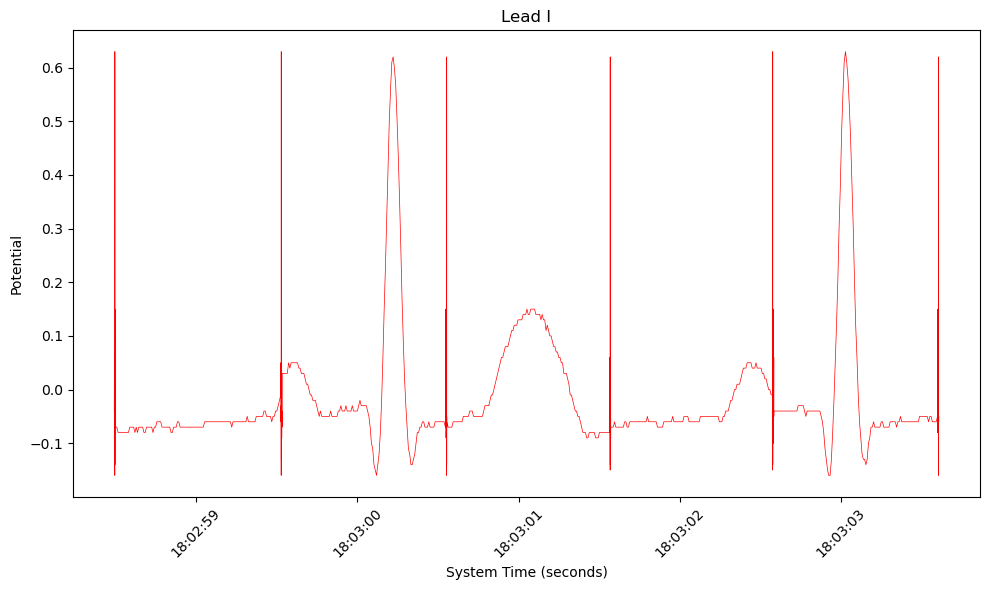

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df1_u['System Time'], df1_u['Potential'], color='r', linewidth=0.5)
plt.xlabel('System Time (seconds)')
plt.ylabel('Potential')
plt.title('Lead I')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

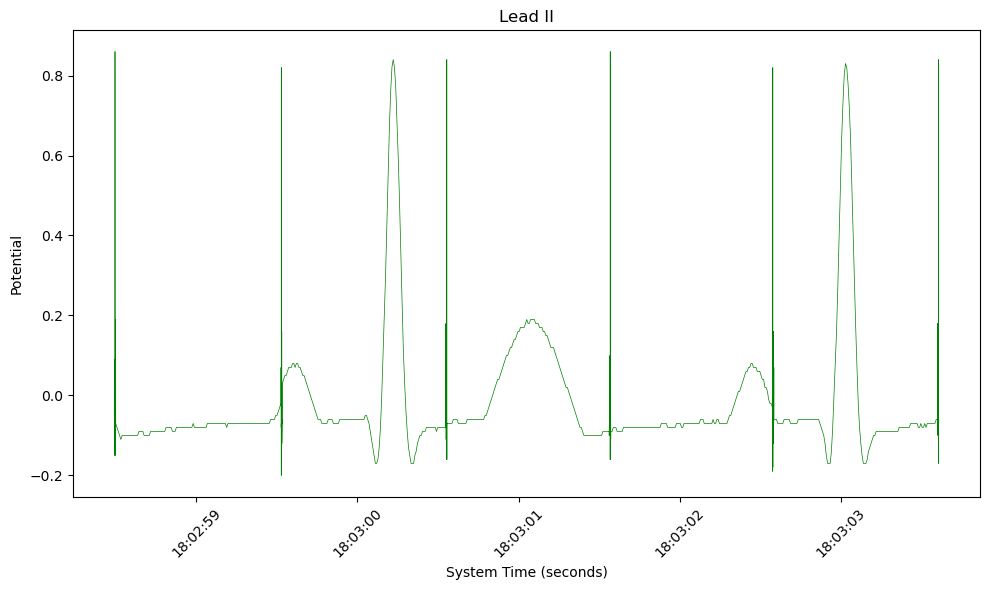

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df2_u['System Time'], df2_u['Potential'], color='g', linewidth=0.5)
plt.xlabel('System Time (seconds)')
plt.ylabel('Potential')
plt.title('Lead II')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

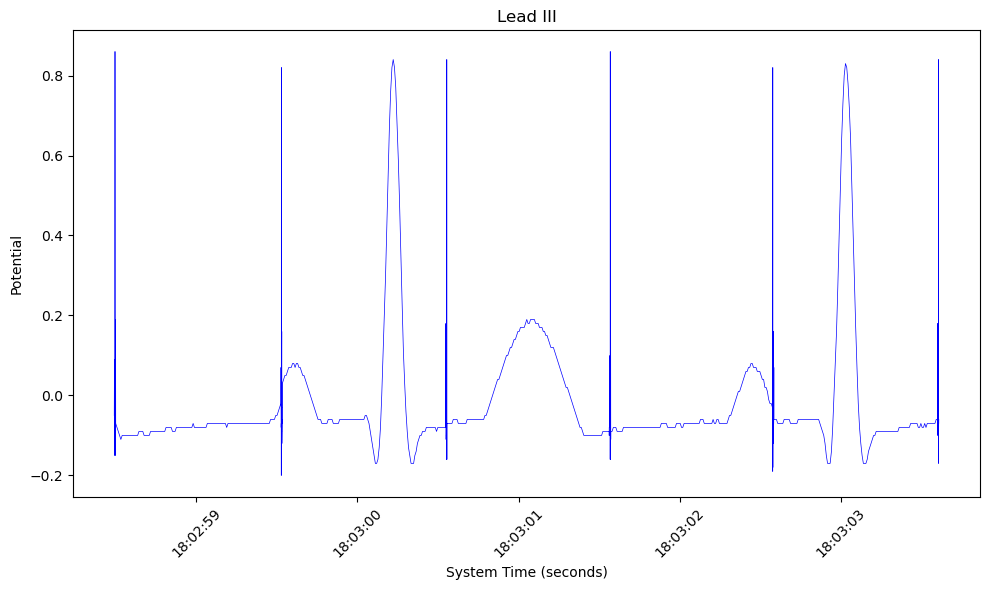

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df2_u['System Time'], df2_u['Potential'], color='b', linewidth=0.5)
plt.xlabel('System Time (seconds)')
plt.ylabel('Potential')
plt.title('Lead III')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot all the waveforms together

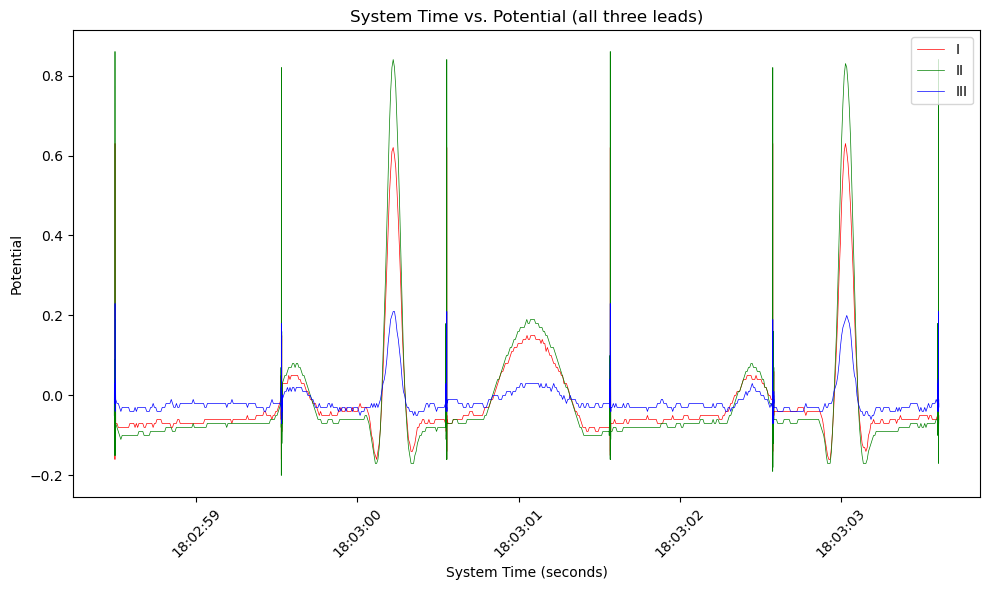

In [14]:
# Plotting 'System Time' against 'Value'
plt.figure(figsize=(10, 6))
plt.plot(df1_u['System Time'], df1_u['Potential'], label="I", color='r', linewidth=0.5)
plt.plot(df2_u['System Time'], df2_u['Potential'], label="II", color='g', linewidth=0.5)
plt.plot(df3_u['System Time'], df3_u['Potential'], label="III", color='b', linewidth=0.5)
plt.xlabel('System Time (seconds)')
plt.ylabel('Potential')
plt.title('System Time vs. Potential (all three leads)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc = "upper right")
plt.show()